STOCK DATASET DATA EXPLORATORY ANALYSIS FROM YAHOO FINANCE

In [1]:
#Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
#Scraping Dataset from Yahoo Finance
START = '2012-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)



In [3]:
#Latest Stock Data
stock_dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.610001
2022-04-01,174.880005,171.940002,174.029999,174.309998,78699800.0,174.309998
2022-04-04,178.490005,174.440002,174.570007,178.440002,76468400.0,178.440002
2022-04-05,178.300003,174.419998,177.500000,175.059998,73311300.0,175.059998
2022-04-06,173.240005,170.130005,172.360001,171.500107,36230102.0,171.500107


In [4]:
#Start of the dataset
stock_dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575920
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643503
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783872
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917509
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021


In [5]:
#Shape of Dataset
stock_dataset.shape

(2583, 6)

In [6]:
#Info Dataset
stock_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2583 entries, 2012-01-03 to 2022-04-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2583 non-null   float64
 1   Low        2583 non-null   float64
 2   Open       2583 non-null   float64
 3   Close      2583 non-null   float64
 4   Volume     2583 non-null   float64
 5   Adj Close  2583 non-null   float64
dtypes: float64(6)
memory usage: 141.3 KB


In [7]:
#Describe Dataset
stock_dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2583.000000,2583.000000,2583.000000,2583.000000,2.583000e+03,2583.000000
mean,52.622761,51.525595,52.067632,52.098393,2.119818e+08,50.323205
std,43.131606,42.104186,42.607654,42.648870,1.746874e+08,43.290646
min,14.271429,13.753571,13.856071,13.947500,3.623010e+07,12.119164
25%,24.003750,23.566250,23.776072,23.767500,1.009982e+08,21.492929
50%,34.165001,33.820000,33.977501,34.132500,1.481588e+08,32.226540
75%,56.660000,55.443750,56.198750,56.032499,2.602040e+08,54.584663
max,182.940002,179.119995,182.630005,182.009995,1.506120e+09,181.778397


In [8]:
#Checking for Null Values
stock_dataset.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

<AxesSubplot:>

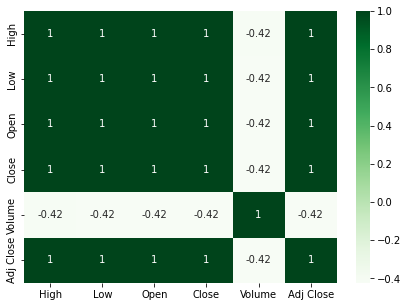

In [9]:
#Plottin Heat Map
plt.figure(figsize=(7,5))
sns.heatmap(stock_dataset.corr(),cmap='Greens',annot=True)

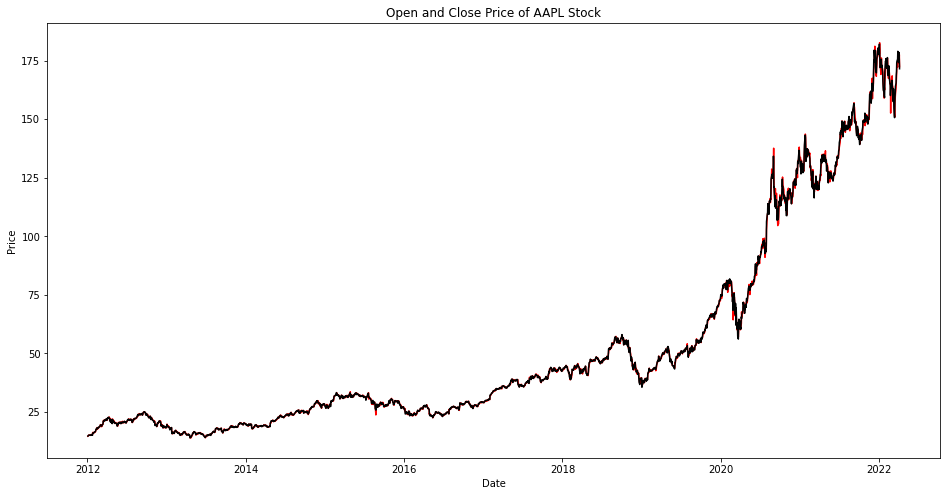

In [10]:
#Plotting Open and Closing Prices of AAPL Stock
plt.figure(figsize=(16,8))
plt.title("Open and Close Price of AAPL Stock")
plt.plot(stock_dataset['Open'], 'red')
plt.plot(stock_dataset['Close'], 'black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

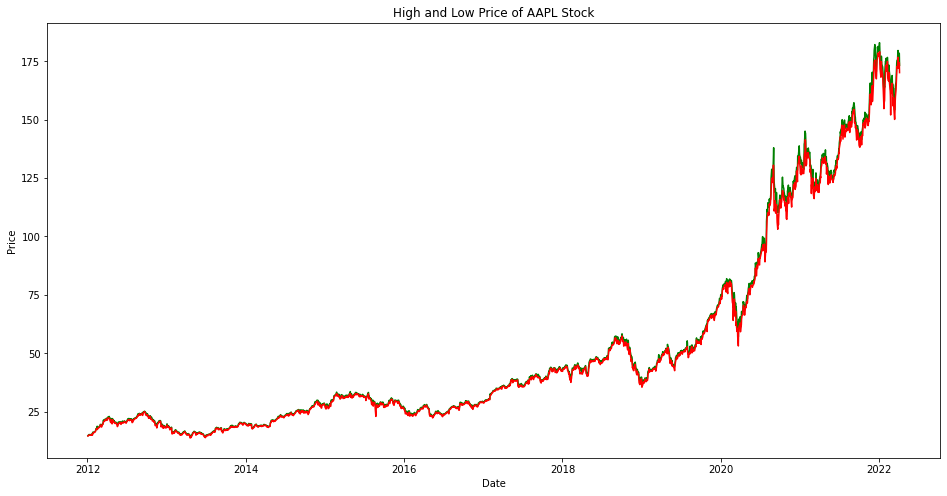

In [11]:
#Plotting High and Low Price Prices
plt.figure(figsize=(16,8))
plt.title("High and Low Price of AAPL Stock")
plt.plot(stock_dataset['High'], 'green')
plt.plot(stock_dataset['Low'], 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

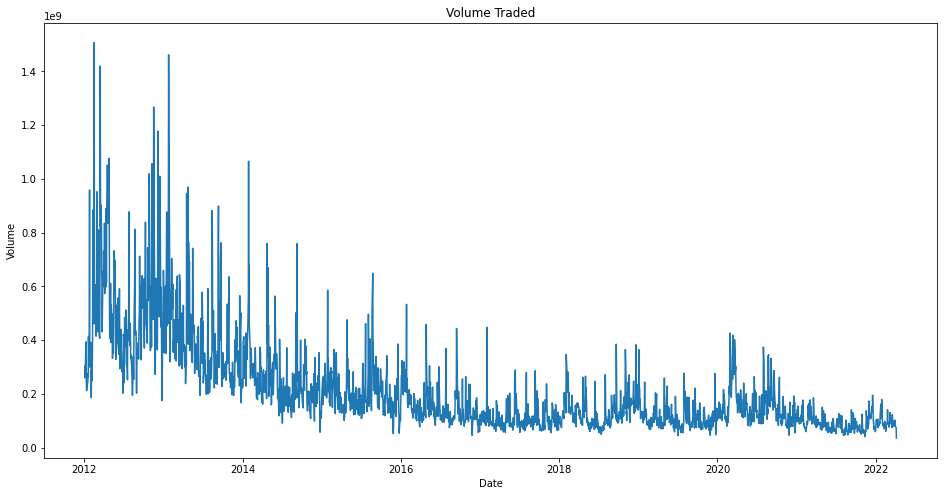

In [12]:
#Plotting Total Volume of HSBC being traded
plt.figure(figsize=(16, 8))
plt.title("Volume Traded")
plt.plot(stock_dataset['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()


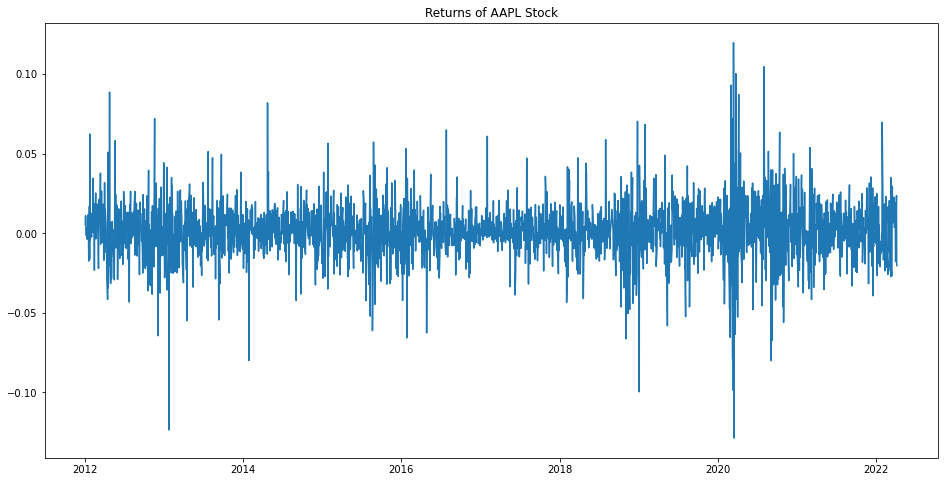

In [13]:
#Plotting Return on Average of AAPL Stock
stock_dataset['Daily Return'] = stock_dataset['Adj Close'].pct_change()
plt.figure(figsize=(16, 8))
plt.title("Returns of AAPL Stock")
plt.plot(stock_dataset['Daily Return'])
plt.show()


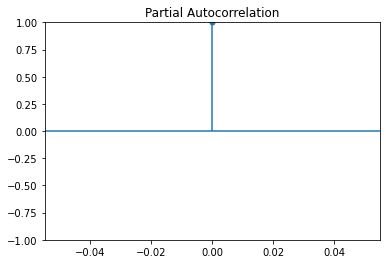

In [14]:
#Plotting PACF Graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
prices = stock_dataset.Close
returns = stock_dataset['Adj Close'].pct_change()
plot_pacf(returns)
plt.show()

C:\Users\RAHUL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


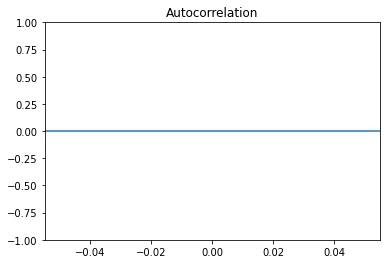

In [15]:
#Plotting ACF Graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(returns)
plt.show()

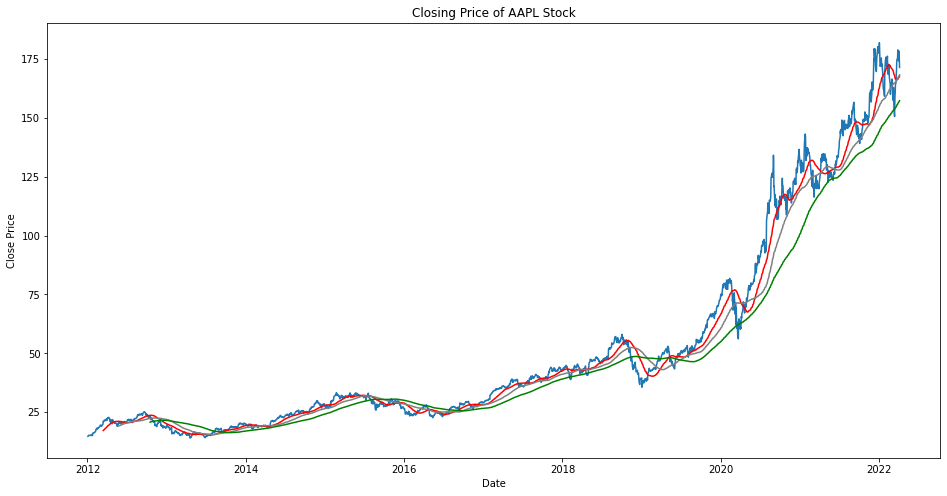

In [16]:
#Moving Average of 50 Days, 100 Days and 200 days
moving_average_50 = stock_dataset.Close.rolling(50).mean()
moving_average_100 = stock_dataset.Close.rolling(100).mean()
moving_average_200 = stock_dataset.Close.rolling(200).mean()


#Plotting 5/100/200 Days Moving Average
plt.figure(figsize=(16,8))
plt.title("Closing Price of AAPL Stock")
plt.plot(stock_dataset['Close'])
plt.plot(moving_average_50, 'red')
plt.plot(moving_average_100, 'grey')
plt.plot(moving_average_200, 'green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [17]:
#Looking at stock prices back 1 Year
START = '2021-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)
prices = stock_dataset.Close
print(prices)

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2022-03-31    174.610001
2022-04-01    174.309998
2022-04-04    178.440002
2022-04-05    175.059998
2022-04-06    171.529999
Name: Close, Length: 318, dtype: float64


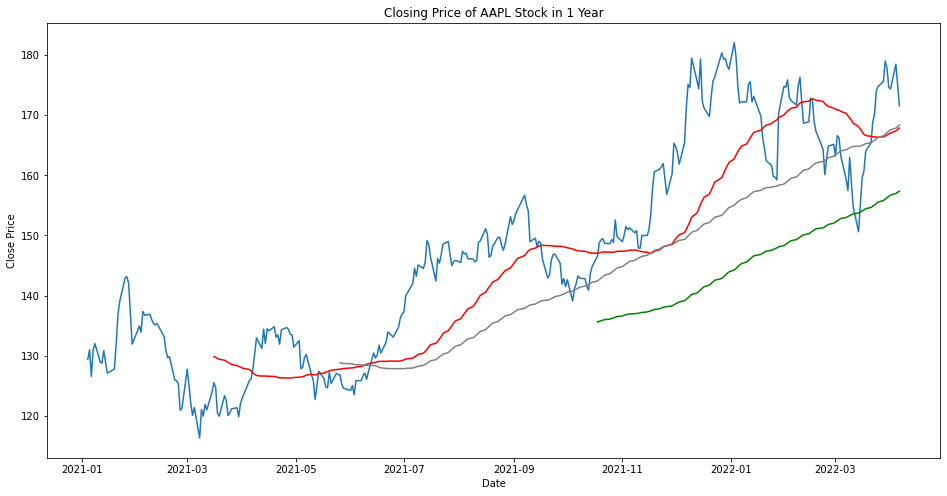

In [18]:
#Moving Average of 50 Days, 100 Days and 200 days

moving_average_50 = stock_dataset.Close.rolling(50).mean()
moving_average_100 = stock_dataset.Close.rolling(100).mean()
moving_average_200 = stock_dataset.Close.rolling(200).mean()


#Plotting 5/100/200 Days Moving Average
plt.figure(figsize=(16,8))
plt.title("Closing Price of AAPL Stock in 1 Year")
plt.plot(stock_dataset['Close'])
plt.plot(moving_average_50, 'red')
plt.plot(moving_average_100, 'grey')
plt.plot(moving_average_200, 'green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Text(0, 0.5, 'Returns')

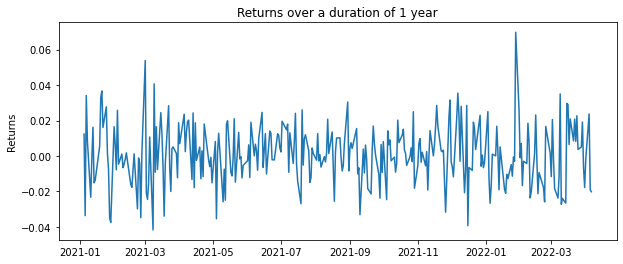

In [19]:
#Plotting Returns over a year
returns = prices.pct_change()
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title("Returns over a duration of 1 year")
plt.ylabel('Returns')

In [20]:
#Scraping Dataset from Yahoo Finance
START = '2013-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)

In [21]:
#New Variables for Heat Map
stock_dataset['Open-High'] = stock_dataset['Open']-stock_dataset['High']
stock_dataset['Open-Low'] = stock_dataset['Open'] - stock_dataset['Low']
stock_dataset['Close-High'] = stock_dataset['Close']-stock_dataset['High']
stock_dataset['Close-Low'] = stock_dataset['Close'] - stock_dataset['Low']
stock_dataset['High-Low'] = stock_dataset['High'] - stock_dataset['Low']
stock_dataset['Open-Close'] = stock_dataset['Open'] - stock_dataset['Close']
stock_dataset.head()

,High,Low,Open,Close,Volume,Adj Close,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close
Date,,,,,,,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,16.939117,-0.042143,0.435356,-0.213215,0.264284,0.477499,0.171072
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.725309,-0.063929,0.245714,-0.270357,0.039286,0.309643,0.206429
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.259432,-0.059286,0.397858,-0.415358,0.041786,0.457144,0.356071
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.163784,-0.260714,0.242857,-0.192856,0.310715,0.503571,-0.067858
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.207289,-0.095715,0.284285,-0.235001,0.144999,0.379999,0.139286


<AxesSubplot:>

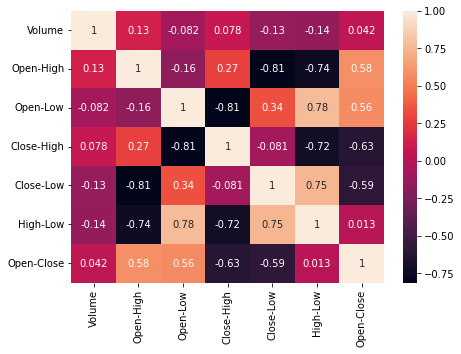

In [22]:
updated_dataset = stock_dataset.copy()
updated_dataset = updated_dataset.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(updated_dataset.corr(),annot=True)

In [23]:
#Scraping Dataset from Yahoo Finance
START = '2013-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)

In [24]:
#Relative Strength Index
def rsi(stock_dataset, window=14):
    close = stock_dataset['Close']
    
    # Price increase or decrease over previous day
    dif = close.diff()
    dif = dif[1:] 
    
    # pos_m identifies stock price going up
    # neg_m udentifies stock price going down
    pos_m, neg_m = dif.copy(), dif.copy()
    pos_m[pos_m < 0] = 0
    neg_m[neg_m > 0] = 0
    
    # Positive Rolling Mean Exponential
    prme = pos_m.ewm(span=window).mean()
    # Negative Rolling Mean Exponential
    nrme = neg_m.abs().ewm(span=window).mean()
    
    # Ratio of magnitude of up move to down move
    RSE = prme / nrme
    RSIE = 100.0 - (100.0 / (1.0 + RSE))
    stock_dataset['rsie'] = RSIE
    
    # Positive Rolling Mean Simple
    prms = pos_m.rolling(window).mean()
    # Negative Rolling Mean Simple
    nrms = neg_m.abs().rolling(window).mean()

    RSS = prms / nrms
    RSIS = 100.0 - (100.0 / (1.0 + RSS))
    
    stock_dataset['rsis'] = RSIS
    return stock_dataset

stock_dataset = rsi(stock_dataset)


In [25]:
stock_dataset.tail(14)

,High,Low,Open,Close,Volume,Adj Close,rsie,rsis
Date,,,,,,,,
2022-03-18,164.479996,159.759995,160.509995,163.979996,123351200.0,163.979996,58.383087,48.750000
2022-03-21,166.350006,163.009995,163.509995,165.380005,95811400.0,165.380005,60.982756,52.417932
2022-03-22,169.419998,164.910004,165.509995,168.820007,81532000.0,168.820007,66.853140,52.502225
2022-03-23,172.639999,167.649994,167.990005,170.210007,98062700.0,170.210007,69.025903,54.305507
2022-03-24,174.139999,170.210007,171.059998,174.070007,90131400.0,174.070007,74.402303,61.590821
2022-03-25,175.279999,172.750000,173.880005,174.720001,80546200.0,174.720001,75.237441,67.602736
2022-03-28,175.729996,172.000000,172.169998,175.600006,90371900.0,175.600006,76.438288,71.205045
2022-03-29,179.009995,176.339996,176.690002,178.960007,100589400.0,178.960007,80.586008,69.682818
2022-03-30,179.610001,176.699997,178.550003,177.770004,92633200.0,177.770004,75.177856,75.714651


In [26]:
import yfinance as yf

appl = yf.Ticker("AAPL")

# get stock info
# appl.info

# get historical market data
hist = appl.history(period="max")


hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100323,0.100759,0.100323,0.100323,469033600,0.0,0.0
1980-12-15,0.095525,0.095525,0.095089,0.095089,175884800,0.0,0.0
1980-12-16,0.088546,0.088546,0.088110,0.088110,105728000,0.0,0.0
1980-12-17,0.090291,0.090727,0.090291,0.090291,86441600,0.0,0.0
1980-12-18,0.092908,0.093345,0.092908,0.092908,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-31,177.839996,178.029999,174.399994,174.610001,103049300,0.0,0.0
2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800,0.0,0.0
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0.0


In [27]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-31,177.839996,178.029999,174.399994,174.610001,103049300,0.0,0.0
2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800,0.0,0.0
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0.0
2022-04-05,177.500000,178.300003,174.419998,175.059998,73311300,0.0,0.0
2022-04-06,172.360001,173.240005,170.130005,171.550003,36256770,0.0,0.0


In [28]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100323,0.100759,0.100323,0.100323,469033600,0.0,0.0
1980-12-15,0.095525,0.095525,0.095089,0.095089,175884800,0.0,0.0
1980-12-16,0.088546,0.088546,0.088110,0.088110,105728000,0.0,0.0
1980-12-17,0.090291,0.090727,0.090291,0.090291,86441600,0.0,0.0
1980-12-18,0.092908,0.093345,0.092908,0.092908,73449600,0.0,0.0


REGRESSION MODELS: LSTM, ARIMA & PROPHET.

CLASSIFICATION MODEL: LOGISTIC REGRESSION, DECISION TREE, RANDOM FOREST.